✅ Energy converged at approximately step: 11017


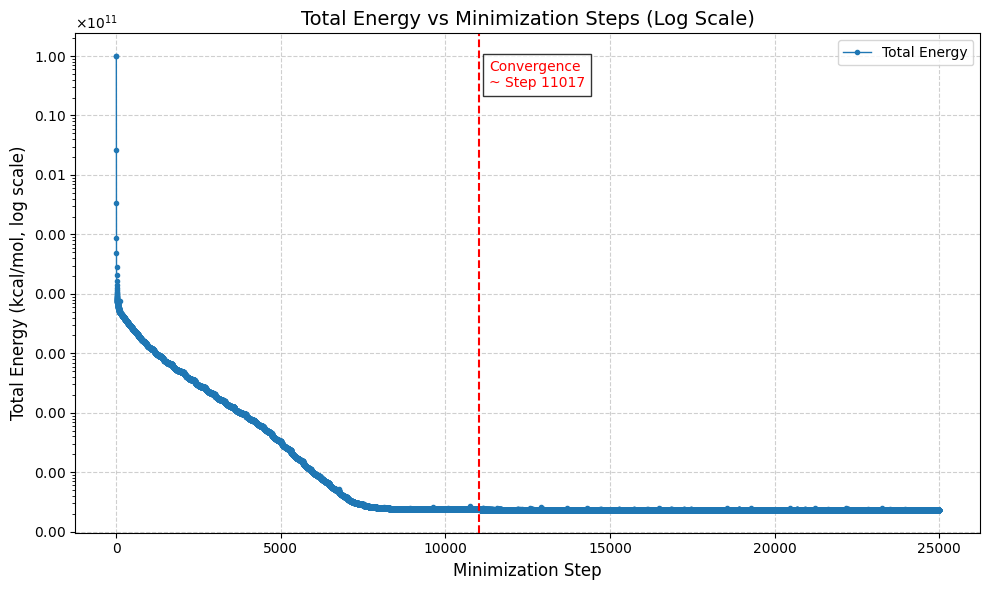

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Load data, skip any bad lines
steps = []
energy = []

with open('/content/energy_data.txt', 'r') as f:
    for line in f:
        try:
            s, e = line.strip().split()
            steps.append(float(s))
            energy.append(float(e))
        except ValueError:
            continue

# Convert to numpy arrays
steps = np.array(steps)
energy = np.array(energy)

# Optional: remove extreme outliers (e.g., top 1% energies)
threshold = np.percentile(energy, 99)
filtered_steps = steps[energy < threshold]
filtered_energy = energy[energy < threshold]

# Compute energy differences for convergence detection
energy_diff = np.abs(np.diff(energy))
diff_threshold = 0.01  # kcal/mol
window = 10

# Detect convergence step
converged_step = None
for i in range(len(energy_diff) - window):
    if np.all(energy_diff[i:i + window] < diff_threshold):
        converged_step = steps[i]
        break

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(steps, energy, marker='o', linestyle='-', linewidth=1, markersize=3, label='Total Energy')

# Log scale for large range
plt.yscale('log')

# Highlight convergence step
if converged_step:
    plt.axvline(converged_step, color='red', linestyle='--', linewidth=1.5)
    plt.text(converged_step + 300, max(energy) * 0.3,
             f'Convergence\n~ Step {int(converged_step)}',
             color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    print(f"✅ Energy converged at approximately step: {int(converged_step)}")
else:
    print("⚠️ No convergence found within threshold.")

# Style
plt.title('Total Energy vs Minimization Steps (Log Scale)', fontsize=14)
plt.xlabel('Minimization Step', fontsize=12)
plt.ylabel('Total Energy (kcal/mol, log scale)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Save and show
plt.savefig("minimization_energy_log_converged.png", dpi=300)
plt.show()

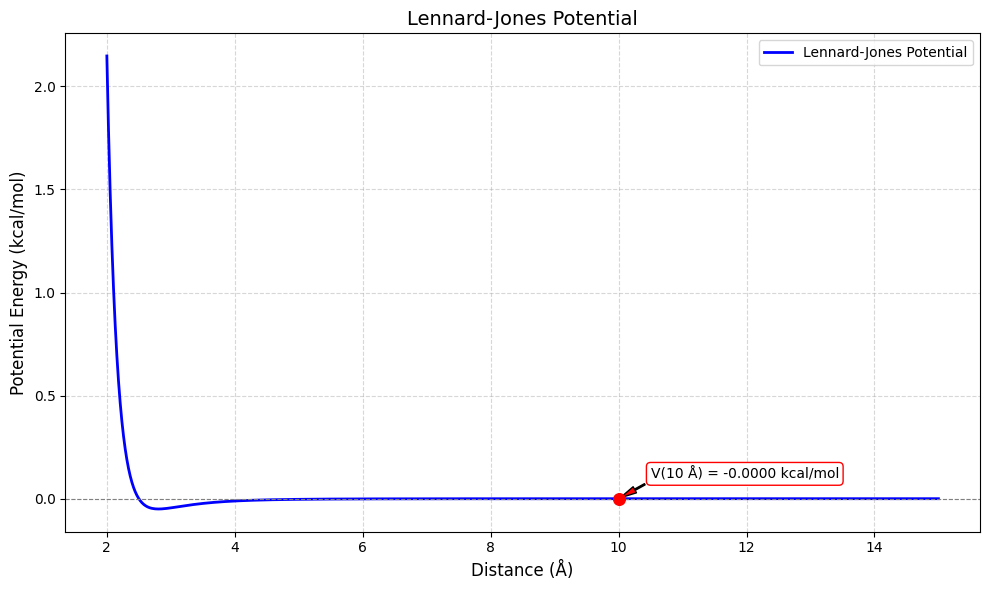

Energy at 10 Å: -0.0000 kcal/mol
✅ 10 Å can be used as a cutoff distance. The potential energy is nearly zero.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Constants
epsilon = 0.050  # kcal/mol
sigma = 2.5      # Å
cutoff_distance = 10  # Å

# Distance range: avoid too small r to prevent explosion
r = np.linspace(2.0, 15.0, 500)

# Lennard-Jones potential function
def lennard_jones(r, epsilon, sigma):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Calculate potential
V = lennard_jones(r, epsilon, sigma)
energy_at_10A = lennard_jones(cutoff_distance, epsilon, sigma)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(r, V, label='Lennard-Jones Potential', color='blue', linewidth=2)
plt.axhline(0, linestyle='--', color='gray', linewidth=0.8)

# Highlight cutoff point
plt.scatter([cutoff_distance], [energy_at_10A], color='red', s=70, zorder=5)
plt.annotate(f'V(10 Å) = {energy_at_10A:.4f} kcal/mol',
             xy=(cutoff_distance, energy_at_10A),
             xytext=(cutoff_distance + 0.5, energy_at_10A + 0.1),
             arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=5),
             fontsize=10,
             bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))

# Formatting
plt.xlabel('Distance (Å)', fontsize=12)
plt.ylabel('Potential Energy (kcal/mol)', fontsize=12)
plt.title('Lennard-Jones Potential', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.tight_layout()
plt.savefig("part2_LJ_potential_improved.png", dpi=300)
plt.show()

# Print analysis
print(f"Energy at 10 Å: {energy_at_10A:.4f} kcal/mol")

if abs(energy_at_10A) < 0.001:
    print("✅ 10 Å can be used as a cutoff distance. The potential energy is nearly zero.")
else:
    print("⚠️ 10 Å might not be a good cutoff. The potential is not negligible.")

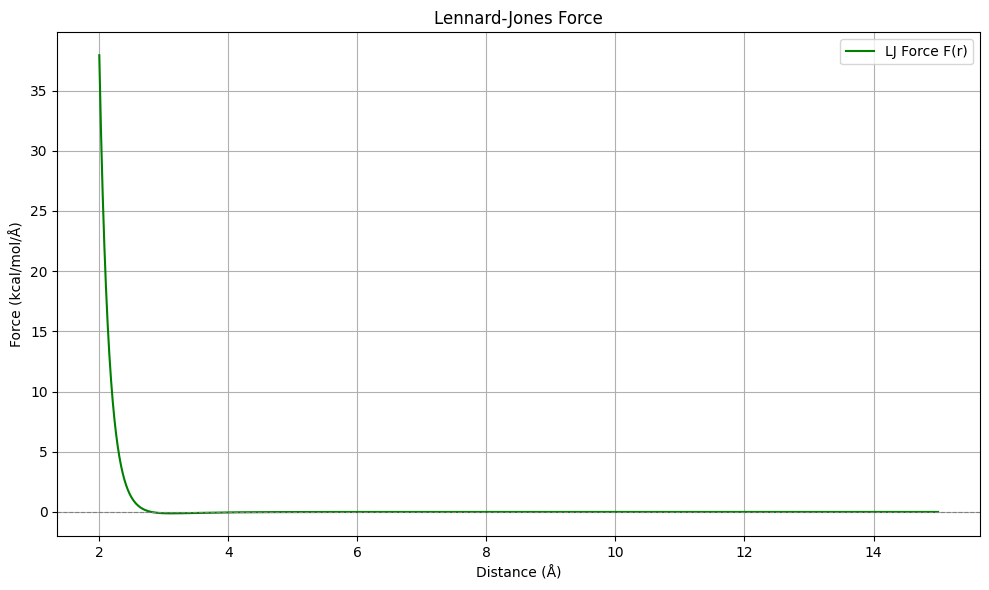

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon = 0.050  # kcal/mol
sigma = 2.5      # Å

# Distance range (same as Part 2)
r = np.linspace(2.0, 15.0, 500)

# Lennard-Jones Force Function
def lj_force(r, epsilon, sigma):
    return 24 * epsilon * (2 * (sigma / r)**13 - (sigma / r)**7)

# Compute force
F = lj_force(r, epsilon, sigma)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(r, F, label='LJ Force F(r)', color='green')
plt.axhline(0, linestyle='--', color='gray', linewidth=0.8)
plt.xlabel('Distance (Å)')
plt.ylabel('Force (kcal/mol/Å)')
plt.title('Lennard-Jones Force')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("part3_LJ_force.png", dpi=300)
plt.show()